In [49]:
import time
start = time.time()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
header = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg',
          'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv('cleveland.csv',names=header)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [52]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [53]:
data['target'] = data.target.map({0:0, 1:1, 2:1, 3:1, 4:1})
data['sex'] = data.sex.map({0:'female',1:'male'})
data['thal'] = data.thal.fillna(data.thal.mean())
data['ca'] = data.ca.fillna(data.ca.mean())

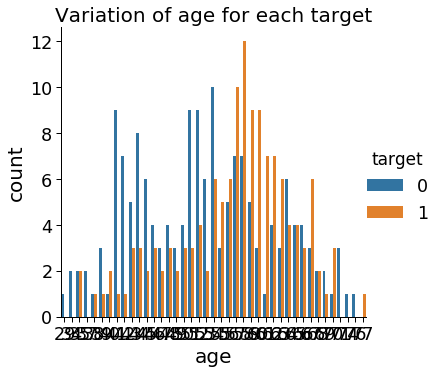

In [54]:
# distribution of target vs age
sns.set_context("paper",font_scale=2, rc={"font.size":10, "axes.titlesize":20, "axes.labelsize":20})
sns.catplot(kind='count', data= data, x='age',hue='target', order=data['age'].sort_values().unique())
plt.title('Variation of age for each target')
plt.show()

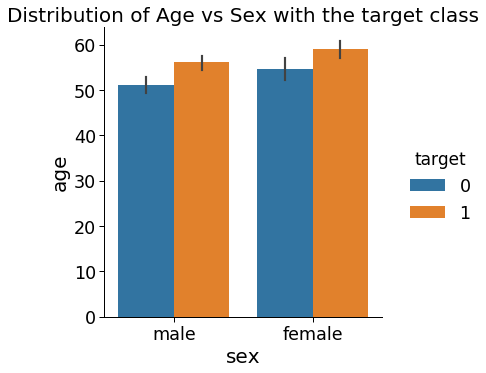

In [55]:
# Barplot of age vs sex with hue=target
sns.catplot(kind = 'bar',data = data, x = 'sex', y = 'age', hue = 'target')
plt.title('Distribution of Age vs Sex with the target class')
plt.show()

In [56]:
data['sex'] = data.sex.map({'female':0, 'male':1})

In [57]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [58]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
print([X.shape, Y.shape])

[(303, 13), (303,)]


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
acc = [['Model','Accuracy']]
acc2 = [['Model','Training Accuracy','Testing Accuracy']]

In [63]:
def print_accuracy_score(noc,Y_test, y_pred):
    s = ["Accuracy Score of Model using " + noc , " {0:.2f} %".format(accuracy_score(Y_test, y_pred)*100)]
    print("Accuracy Score of Model using " + noc +" : {0:.2f} %".format(accuracy_score(Y_test, y_pred)*100))
    acc.append(s)

In [64]:
def print_accuracies(noc,cm_train,cm_test):
    
    acc_train = ((cm_train[0][0] + cm_train[1][1]) / len(Y_train)) * 100
    acc_test = ((cm_test[0][0] + cm_test[1][1]) / len(Y_test)) * 100
    x = [noc,"{0:.2f} %".format(acc_train),"{0:.2f} %".format(acc_test)]
    acc2.append(x)
    print("Accuracy Score for training set : {0:.2f} %".format(acc_train))
    print("Accuracy Score for testing set : {0:.2f} %".format(acc_test))

# # 1.Support Vector Machine (SVM)

In [65]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_train, Y_train)

SVC()

In [66]:
y_pred_svm = clf_svm.predict(X_test)
y_pred_svm_train = clf_svm.predict(X_train)

In [67]:
print_accuracy_score('SVM',Y_test, y_pred_svm)

Accuracy Score of Model using SVM : 90.16 %


In [68]:
cm_test = confusion_matrix(Y_test, y_pred_svm)
cm_train = confusion_matrix(Y_train, y_pred_svm_train)

print_accuracies('SVM',cm_train,cm_test)

Accuracy Score for training set : 90.08 %
Accuracy Score for testing set : 90.16 %


# # 2.Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
clf_log.fit(X_train, Y_train)

LogisticRegression()

In [70]:
y_pred_log = clf_log.predict(X_test)
y_pred_log_train = clf_log.predict(X_train)

In [71]:
print_accuracy_score('Logistic Regression',Y_test, y_pred_log)

Accuracy Score of Model using Logistic Regression : 88.52 %


In [72]:
cm_test = confusion_matrix(Y_test, y_pred_log)
cm_train = confusion_matrix(Y_train, y_pred_log_train)

print_accuracies('Logistic Regression',cm_train,cm_test)

Accuracy Score for training set : 83.88 %
Accuracy Score for testing set : 88.52 %


# # 3.Decision Tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier()
clf_dec.fit(X_train, Y_train)

DecisionTreeClassifier()

In [74]:
y_pred_dec = clf_dec.predict(X_test)
y_pred_dec_train = clf_dec.predict(X_train)

In [75]:
print_accuracy_score('Decision Tree',Y_test, y_pred_dec)

Accuracy Score of Model using Decision Tree : 75.41 %


In [76]:
cm_test = confusion_matrix(Y_test, y_pred_dec)
cm_train = confusion_matrix(Y_train, y_pred_dec_train)

print_accuracies('Decision Tree',cm_train,cm_test)

Accuracy Score for training set : 100.00 %
Accuracy Score for testing set : 75.41 %


# # 4.Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB()

In [78]:
y_pred_nb = clf_nb.predict(X_test)
y_pred_nb_train = clf_nb.predict(X_train)

In [79]:
print_accuracy_score('Naive Bayes',Y_test, y_pred_nb)

Accuracy Score of Model using Naive Bayes : 83.61 %


In [80]:
cm_test = confusion_matrix(Y_test, y_pred_nb)
cm_train = confusion_matrix(Y_train, y_pred_nb_train)

print_accuracies('Naive Bayes',cm_train,cm_test)

Accuracy Score for training set : 84.71 %
Accuracy Score for testing set : 83.61 %


# # 5.Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [82]:
y_pred_rf = clf_rf.predict(X_test)
y_pred_rf_train = clf_rf.predict(X_train)

In [83]:
print_accuracy_score('Random Forest',Y_test, y_pred_rf)

Accuracy Score of Model using Random Forest : 90.16 %


In [84]:
cm_test = confusion_matrix(Y_test, y_pred_rf)
cm_train = confusion_matrix(Y_train, y_pred_rf_train)

print_accuracies('Naive Bayes',cm_train,cm_test)

Accuracy Score for training set : 100.00 %
Accuracy Score for testing set : 90.16 %


# # 6.LightGBM

In [85]:
import lightgbm as lgb

In [86]:
d_train = lgb.Dataset(X_train,label=Y_train)
params = {}

clf_lgb = lgb.train(params,d_train,100)

In [87]:
y_pred_lgb = clf_lgb.predict(X_test)

for i in range(len(y_pred_lgb)):
    if y_pred_lgb[i] >= 0.5:
        y_pred_lgb[i] = 1
    else:
        y_pred_lgb[i] = 0
        
y_pred_lgb_train = clf_lgb.predict(X_train)

for i in range(len(y_pred_lgb_train)):
    if y_pred_lgb_train[i] >= 0.5:
        y_pred_lgb_train[i] = 1
    else:
        y_pred_lgb_train[i] = 0

In [88]:
print_accuracy_score('LightGBM',Y_test, y_pred_lgb)

Accuracy Score of Model using LightGBM : 88.52 %


In [89]:
cm_test = confusion_matrix(Y_test, y_pred_lgb)
cm_train = confusion_matrix(Y_train, y_pred_lgb_train)

print_accuracies('LightGBM',cm_train,cm_test)

Accuracy Score for training set : 98.76 %
Accuracy Score for testing set : 88.52 %


# # 7.XGBoost

In [90]:
from xgboost import XGBClassifier
clf_xg = XGBClassifier()
clf_xg.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_pred_xg = clf_xg.predict(X_test)
y_pred_xg_train = clf_xg.predict(X_train)
for i in range(0,len(y_pred_xg_train)):
    if y_pred_xg_train[i] >= 0.5:
        y_pred_xg_train[i] = 1
    else:
        y_pred_xg_train[i] = 0

In [92]:
print_accuracy_score('XGBoost',Y_test, y_pred_xg)

Accuracy Score of Model using XGBoost : 83.61 %


In [93]:
cm_test = confusion_matrix(Y_test, y_pred_xg)
cm_train = confusion_matrix(Y_train, y_pred_xg_train)

print_accuracies('XGBoost',cm_train,cm_test)

Accuracy Score for training set : 100.00 %
Accuracy Score for testing set : 83.61 %


# # Print Accuracies 

In [94]:
from texttable import Texttable
t = Texttable()
t.add_rows(acc)
print(t.draw())

+---------------------------------------------------+----------+
|                       Model                       | Accuracy |
+===================================================+==========+
| Accuracy Score of Model using SVM                 |  90.16 % |
+---------------------------------------------------+----------+
| Accuracy Score of Model using Logistic Regression |  88.52 % |
+---------------------------------------------------+----------+
| Accuracy Score of Model using Decision Tree       |  75.41 % |
+---------------------------------------------------+----------+
| Accuracy Score of Model using Naive Bayes         |  83.61 % |
+---------------------------------------------------+----------+
| Accuracy Score of Model using Random Forest       |  90.16 % |
+---------------------------------------------------+----------+
| Accuracy Score of Model using LightGBM            |  88.52 % |
+---------------------------------------------------+----------+
| Accuracy Score of Model

In [95]:
t2 = Texttable()
t2.add_rows(acc2)
print(t2.draw())

+---------------------+-------------------+------------------+
|        Model        | Training Accuracy | Testing Accuracy |
+=====================+===================+==================+
| SVM                 | 90.08 %           | 90.16 %          |
+---------------------+-------------------+------------------+
| Logistic Regression | 83.88 %           | 88.52 %          |
+---------------------+-------------------+------------------+
| Decision Tree       | 100.00 %          | 75.41 %          |
+---------------------+-------------------+------------------+
| Naive Bayes         | 84.71 %           | 83.61 %          |
+---------------------+-------------------+------------------+
| Naive Bayes         | 100.00 %          | 90.16 %          |
+---------------------+-------------------+------------------+
| LightGBM            | 98.76 %           | 88.52 %          |
+---------------------+-------------------+------------------+
| XGBoost             | 100.00 %          | 83.61 %    

In [96]:
end = time.time()
print('%0.3f'%(end-start) + " sec")

1.532 sec
